In [1]:
import gpytorch
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Small example
we take 5 elections (1949 - 1965), 2 counties (Flensburg and Kiel) and 9 Parties as in every file

In [2]:
# import the 5 elections from 1949 - 1965

elections_1949_df = pd.read_csv('Bundestagswahlen_clean/elections_1949.csv')
elections_1953_df = pd.read_csv('Bundestagswahlen_clean/elections_1953.csv')
elections_1957_df = pd.read_csv('Bundestagswahlen_clean/elections_1957.csv')
elections_1961_df = pd.read_csv('Bundestagswahlen_clean/elections_1961.csv')
elections_1965_df = pd.read_csv('Bundestagswahlen_clean/elections_1965.csv')
elections_1969_df = pd.read_csv('Bundestagswahlen_clean/elections_1969.csv')
elections_1972_df = pd.read_csv('Bundestagswahlen_clean/elections_1972.csv')
elections_1976_df = pd.read_csv('Bundestagswahlen_clean/elections_1976.csv')
elections_1980_df = pd.read_csv('Bundestagswahlen_clean/elections_1980.csv')
elections_1983_df = pd.read_csv('Bundestagswahlen_clean/elections_1983.csv')
elections_1987_df = pd.read_csv('Bundestagswahlen_clean/elections_1987.csv')
elections_1990_df = pd.read_csv('Bundestagswahlen_clean/elections_1990.csv')
elections_1994_df = pd.read_csv('Bundestagswahlen_clean/elections_1994.csv')
elections_1998_df = pd.read_csv('Bundestagswahlen_clean/elections_1998.csv')
elections_2002_df = pd.read_csv('Bundestagswahlen_clean/elections_2002.csv')
elections_2005_df = pd.read_csv('Bundestagswahlen_clean/elections_2005.csv')
elections_2009_df = pd.read_csv('Bundestagswahlen_clean/elections_2009.csv')
elections_2013_df = pd.read_csv('Bundestagswahlen_clean/elections_2013.csv')
elections_2017_df = pd.read_csv('Bundestagswahlen_clean/elections_2017.csv')

years = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983, 1987, 
         1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]

elections_1949_df.head(6)

,Unnamed: 0,Wahlkreis,Gebiet,Wahlberechtigte,Wähler,Ungültige,Gültige,CDU/CSU,CDU/CSU_prev,CDU/CSU:2,CDU/CSU:2_prev,SPD,SPD_prev,SPD:2,SPD:2_prev,FDP,FDP_prev,FDP:2,FDP:2_prev,GRUENE,GRUENE_prev,GRUENE:2,GRUENE:2_prev,LINKE,LINKE_prev,LINKE:2,LINKE:2_prev,AFD,AFD_prev,AFD:2,AFD:2_prev,KPD,KPD_prev,KPD:2,KPD:2_prev,BHE,BHE_prev,BHE:2,BHE:2_prev,OTHER,OTHER_prev,OTHER:2,OTHER:2_prev
0,2,1,Husum  Südtondern  Eiderstedt,117513.0,94615.0,1693.0,92922.0,28901.0,0,0,0,19987.0,0,0,0,11817.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1405.0,0,0,0,0,0,0,0,30812.0,0,0,0
1,3,2,Flensburg,131177.0,112871.0,1431.0,111440.0,0.0,0,0,0,16801.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1895.0,0,0,0,0,0,0,0,92744.0,0,0,0
2,4,3,Schleswig  Eckernförde,123483.0,103269.0,1376.0,101893.0,28850.0,0,0,0,17489.0,0,0,0,1101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1530.0,0,0,0,0,0,0,0,52923.0,0,0,0
3,5,4,Norder- und Süderdithmarschen,116535.0,94709.0,1765.0,92944.0,30412.0,0,0,0,24129.0,0,0,0,3950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1857.0,0,0,0,0,0,0,0,32596.0,0,0,0
4,6,5,Rendsburg,133432.0,110887.0,1756.0,109131.0,41567.0,0,0,0,24087.0,0,0,0,2893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2679.0,0,0,0,0,0,0,0,37905.0,0,0,0
5,7,6,Kiel,151052.0,124920.0,2347.0,122573.0,64894.0,0,0,0,43712.0,0,0,0,1766.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6690.0,0,0,0,0,0,0,0,5511.0,0,0,0


In [3]:
elections_1949_df.columns

Index(['Unnamed: 0', 'Wahlkreis', 'Gebiet', 'Wahlberechtigte', 'Wähler',
       'Ungültige', 'Gültige', 'CDU/CSU', 'CDU/CSU_prev', 'CDU/CSU:2',
       'CDU/CSU:2_prev', 'SPD', 'SPD_prev', 'SPD:2', 'SPD:2_prev', 'FDP',
       'FDP_prev', 'FDP:2', 'FDP:2_prev', 'GRUENE', 'GRUENE_prev', 'GRUENE:2',
       'GRUENE:2_prev', 'LINKE', 'LINKE_prev', 'LINKE:2', 'LINKE:2_prev',
       'AFD', 'AFD_prev', 'AFD:2', 'AFD:2_prev', 'KPD', 'KPD_prev', 'KPD:2',
       'KPD:2_prev', 'BHE', 'BHE_prev', 'BHE:2', 'BHE:2_prev', 'OTHER',
       'OTHER_prev', 'OTHER:2', 'OTHER:2_prev'],
      dtype='object')

In [4]:
# drop column "Gebiet"
#small_df = small_df.drop(columns=['Gebiet'])

# apply the Laplace Bridge
def Dirichlet_bridge_mu(alpha):
    alpha = np.array(alpha, dtype='int')
    k = len(alpha)
    C = 1/k * np.sum(np.log(alpha))
    return(np.log(alpha) - C)

def Dirichlet_bridge_Sigma(alpha):
    K = len(alpha)
    Sigma = np.zeros((K, K))
    sum_inv_alphas = np.sum(1/alpha)
    for k in range(K):
        for l in range(K):
            x_ = -1/K * (1/alpha[k] + 1/alpha[l] - 1/K*sum_inv_alphas)
            if k == l:
                x_ += 1/alpha[k]
            Sigma[k,l] = x_
            
    return(Sigma)

def Dirichlet_bridge_alpha(mu, Sigma):
    K = len(mu)
    Sigma_diag = np.diag(Sigma)
    sum_m_exp = np.sum(np.exp(-mu))
    return(1/Sigma_diag * (1 - 2/K + np.exp(mu)/K**2 * sum_m_exp))


def softmax_vector(mu):
    mu = np.array(mu)
    return(np.exp(mu)/np.sum(np.exp(mu)))

def softmax_batch(mu_batch):
    mu_batch = np.array(mu_batch)
    return(np.exp(mu_batch)/np.sum(np.exp(mu_batch), 1)[:,np.newaxis])

In [5]:
#test some alpha values

test_a = np.arange(1, 10)
test_mu = Dirichlet_bridge_mu(test_a)
test_Sigma = Dirichlet_bridge_Sigma(test_a)
test_a2 = Dirichlet_bridge_alpha(test_mu, test_Sigma)
assert(np.allclose(test_a, test_a2))

# Larger example

In [6]:
# Select the 2 Wahlkreise (Flensburg and Kiel) with the 9 parties

cols = ['Gebiet', 'CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']
regions = ['Bundesgebiet ohne Berlin', 'Bundesgebiet','Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 
           'Bremen', 'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz', 'Baden-Württemberg', 'Bayern', 
           'BUNDESGEBIET OHNE BERLIN', 'SCHLESWIG-HOLSTEIN', 'HAMBURG', 'NIEDERSACHSEN', 'BREMEN',
           'NORDRHEIN-WESTFALEN', 'HESSEN', 'RHEINLAND-PFALZ', 'BADEN-WUERTTEMBERG', 'BAYERN']

parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

n_regions = 10
n_parties = 9

medium_df = pd.DataFrame(columns=cols)

for df in [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
          elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
          elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
          elections_2005_df, elections_2009_df, elections_2013_df, elections_2017_df]:
    
    df_ = df[cols]
    df_ = df_.loc[df['Gebiet'].isin(regions)]
    medium_df = medium_df.append(df_)
    
medium_df = medium_df.drop(columns=['Gebiet'])
print(len(medium_df))
print(19*n_regions)
assert(19*n_regions == len(medium_df))
medium_df

190
190


,CDU/CSU,SPD,FDP,GRUENE,LINKE,AFD,KPD,BHE,OTHER
14,428956.0,413257.0,103492.0,0,0,0,43744.0,0,408222.0
23,178786.0,358873.0,143371.0,0,0,0,76747.0,0,147667.0
58,593691.0,1125295.0,252141.0,0,0,0,104132.0,0,1290706.0
62,51290.0,104509.0,39228.0,0,0,0,20530.0,0,88308.0
129,2481523.0,2109172.0,581456.0,0,0,0,513225.0,0,1041167.0
152,454437.0,684042.0,597081.0,0,0,0,142539.0,0,250179.0
168,702125.0,408905.0,226625.0,0,0,0,89026.0,0,4875.0
202,1087828.0,655506.0,482381.0,0,0,0,175911.0,0,343827.0
250,1380448.0,1075416.0,404145.0,0,0,0,195852.0,0,1671762.0
251,7359084.0,6934975.0,2829920.0,0,0,0,1361706.0,0,5246713.0


In [7]:
# get the data without the GP
regions_ger = ['Bundesgebiet ohne Berlin', 'Bundesgebiet', 'BUNDESGEBIET OHNE BERLIN']

ger_counts_df = pd.DataFrame(columns=cols)

for df in [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
          elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
          elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
          elections_2005_df, elections_2009_df, elections_2013_df, elections_2017_df]:
    
    df_ = df[cols]
    df_ = df_.loc[df['Gebiet'].isin(regions_ger)]
    ger_counts_df = ger_counts_df.append(df_)
    
ger_counts_df = ger_counts_df.drop(columns=['Gebiet'])
ger_counts_df

,CDU/CSU,SPD,FDP,GRUENE,LINKE,AFD,KPD,BHE,OTHER
251,7359084.0,6934975.0,2829920.0,0,0,0,1361706.0,0,5246713.0
251,12027945.0,8131257.0,2967566.0,0,0,0,611317.0,1613215,2168460.0
257,15161550.0,9651669.0,2276234.0,0,0,0,0.0,1324636,1742125.0
257,14727737.0,11672057.0,3866269.0,0,0,0,0.0,0,1738403.0
258,15835967.0,12998474.0,2562294.0,0,0,0,0.0,0,1040314.0
258,15231324.0,14402374.0,1554651.0,0,0,0,0.0,0,1525167.0
258,16925438.0,18228239.0,1790513.0,0,0,0,146258.0,0,213331.0
258,18431671.0,16471321.0,2417683.0,0,0,0,179677.0,0,195292.0
257,17408572.0,16808861.0,2720480.0,732619,0,0,107158.0,0,28841.0
257,20262260.0,15686033.0,1087918.0,1609855,0,0,96143.0,0,103144.0


In [8]:
T = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983,
     1987, 1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]
P = np.arange(1,n_parties + 1)
C = np.arange(1,n_regions + 1)

X = np.zeros((len(T)*len(P)*len(C), 3))
print(np.shape(X))
idx = 0
for t in T:
    for c in C:
        for p in P:
            X[idx] = [t, c, p]
            idx += 1
            
print(X[:20, :])

(1710, 3)
[[1.949e+03 1.000e+00 1.000e+00]
 [1.949e+03 1.000e+00 2.000e+00]
 [1.949e+03 1.000e+00 3.000e+00]
 [1.949e+03 1.000e+00 4.000e+00]
 [1.949e+03 1.000e+00 5.000e+00]
 [1.949e+03 1.000e+00 6.000e+00]
 [1.949e+03 1.000e+00 7.000e+00]
 [1.949e+03 1.000e+00 8.000e+00]
 [1.949e+03 1.000e+00 9.000e+00]
 [1.949e+03 2.000e+00 1.000e+00]
 [1.949e+03 2.000e+00 2.000e+00]
 [1.949e+03 2.000e+00 3.000e+00]
 [1.949e+03 2.000e+00 4.000e+00]
 [1.949e+03 2.000e+00 5.000e+00]
 [1.949e+03 2.000e+00 6.000e+00]
 [1.949e+03 2.000e+00 7.000e+00]
 [1.949e+03 2.000e+00 8.000e+00]
 [1.949e+03 2.000e+00 9.000e+00]
 [1.949e+03 3.000e+00 1.000e+00]
 [1.949e+03 3.000e+00 2.000e+00]]


In [9]:
# build the kernel

def k_SEK(x, x_, s=1, l=2):
    return(s*np.exp(-(x-x_)**2 / (2*l**2)))

def k_RQ(x, x_, s=1, l=10, a=0.1):
    return(s**2 * (1 + (x-x_)**2/(2*a*l**2)))**(-a)

def k_dirac_soft(x, x_):
    if x == x_:
        return(1)
    else:
        return(0.1)

n = len(X)
K_XX = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        t_i = X[i,0]
        c_i = X[i,1]
        p_i = X[i,2]
        t_j = X[j,0]
        c_j = X[j,1]
        p_j = X[j,2]
        #K_XX[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_XX[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_XX))
K_XX[10:,:]

(1710, 1710)


array([[0.01      , 0.1       , 0.01      , ..., 0.00579981, 0.00579981,
        0.00579981],
       [0.01      , 0.01      , 0.1       , ..., 0.00579981, 0.00579981,
        0.00579981],
       [0.01      , 0.01      , 0.01      , ..., 0.00579981, 0.00579981,
        0.00579981],
       ...,
       [0.00579981, 0.00579981, 0.00579981, ..., 1.        , 0.1       ,
        0.1       ],
       [0.00579981, 0.00579981, 0.00579981, ..., 0.1       , 1.        ,
        0.1       ],
       [0.00579981, 0.00579981, 0.00579981, ..., 0.1       , 0.1       ,
        1.        ]])

In [10]:
# prep y data

#prior for the dirichlet
alpha_0 = 1 

Y_mu = np.array([Dirichlet_bridge_mu(np.array(row[1].values) + alpha_0) for row in medium_df.iterrows()])
Y_mu = Y_mu.reshape(-1)

#print(Y_mu)

Y_Sigma = [Dirichlet_bridge_Sigma(np.array(row[1].values) + alpha_0) for row in medium_df.iterrows()]
Y_Sigma_block = np.zeros((n,n))
idx = 0
for S in Y_Sigma:
    Y_Sigma_block[idx:idx+n_parties, idx:idx+n_parties] = S
    idx += n_parties

In [11]:
# calculate GP stuff
from numpy.random import randn, multivariate_normal
from numpy.linalg import cholesky, solve
from scipy.linalg import cho_solve, cho_factor

G = K_XX + Y_Sigma_block
G = cho_factor(G)

In [12]:
# 

T_x = np.arange(1949, 2017)
P_x = np.arange(1,n_parties + 1)
C_x = np.arange(1,n_regions + 1)

x = np.zeros((len(T_x)*len(P_x)*len(C_x), 3))
print(np.shape(x))
idx = 0
for t in T_x:
    for c in C_x:
        for p in P_x:
            x[idx] = [t, c, p]
            idx += 1

n_ = len(x)
K_xX = np.zeros((n_, n))
for i in range(n_):
    for j in range(n):
        t_i = x[i,0]
        c_i = x[i,1]
        p_i = x[i,2]
        t_j = X[j,0]
        c_j = X[j,1]
        p_j = X[j,2]
        #K_xX[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_xX[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_xX))

K_xx = np.zeros((n_, n_))
for i in range(n_):
    for j in range(n_):
        t_i = x[i,0]
        c_i = x[i,1]
        p_i = x[i,2]
        t_j = x[j,0]
        c_j = x[j,1]
        p_j = x[j,2]
        #K_xx[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_xx[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_xx))

(6120, 3)
(6120, 1710)
(6120, 6120)


In [13]:
# do some inference 
A = cho_solve(G, K_xX.T).T

out = {}

# # posterior p(f_x|Y) = N(f_x,mpost,vpost)
out["mpost"] = A @ Y_mu #m(x) + A @ (Y - mX)  # mean
out["vpost"] = K_xx - A @ K_xX.T  # covariance
out["spost"] = multivariate_normal(
    out["mpost"].flatten(), out["vpost"], size=5
).T

In [26]:
test_1 = out["mpost"]
test_1_v = np.diag(out["vpost"])
print(np.shape(test_1))
print(np.shape(test_1_v))
def logistic_transform(x):
    return(1/(1+np.exp(-x)))

print(test_1_v[:10])
print(logistic_transform(test_1_v[:10]))

test_1 = test_1.reshape((-1, n_regions*n_parties))
test_1_v = test_1_v.reshape((-1, n_regions*n_parties))
print(np.shape(test_1))
print(np.shape(test_1_v))

test_1_ger = test_1[:, :n_parties]
test_1_SH = test_1[:, n_parties:2*n_parties]
test_1_HH = test_1[:, 2*n_parties:3*n_parties]
test_1_NS = test_1[:, 3*n_parties:4*n_parties]
test_1_HB = test_1[:, 4*n_parties:5*n_parties]
test_1_NW = test_1[:, 5*n_parties:6*n_parties]
test_1_HS = test_1[:, 6*n_parties:7*n_parties]
test_1_RP = test_1[:, 7*n_parties:8*n_parties]
test_1_BW = test_1[:, 8*n_parties:9*n_parties]
test_1_BY = test_1[:, 9*n_parties:10*n_parties]

test_1_ger_v = test_1_v[:, :n_parties]
test_1_SH_v = test_1_v[:, n_parties:2*n_parties]
test_1_HH_v = test_1_v[:, 2*n_parties:3*n_parties]
test_1_NS_v = test_1_v[:, 3*n_parties:4*n_parties]
test_1_HB_v = test_1_v[:, 4*n_parties:5*n_parties]
test_1_NW_v = test_1_v[:, 5*n_parties:6*n_parties]
test_1_HS_v = test_1_v[:, 6*n_parties:7*n_parties]
test_1_RP_v = test_1_v[:, 7*n_parties:8*n_parties]
test_1_BW_v = test_1_v[:, 8*n_parties:9*n_parties]
test_1_BY_v = test_1_v[:, 9*n_parties:10*n_parties]

print(np.shape(test_1_ger))
print(np.shape(test_1_ger_v))

(6120,)
(6120,)
[0.01258435 0.0125844  0.01258908 0.18988917 0.19141556 0.19199201
 0.01259761 0.08203749 0.01258442 0.01258519]
[0.50314605 0.50314606 0.50314723 0.54733016 0.54770831 0.54785111
 0.50314936 0.52049788 0.50314606 0.50314626]
(68, 90)
(68, 90)
(68, 9)
(68, 9)


In [15]:
test_1_BY_df = pd.DataFrame(test_1_BY)
test_1_BY_df.columns = parties
test_1_BY_df['year'] = range(1949, 2017)
#print(len(test_1_BY_df))
#print(len(range(1949, 2017)))
test_1_BY_df

,CDU/CSU,SPD,FDP,GRUENE,LINKE,AFD,KPD,BHE,OTHER,year
0,5.275045,5.215687,4.319358,-7.102946,-7.535490,-8.699878,3.587845,0.003669,4.936710,1949
1,5.294733,5.163630,4.282768,-7.286083,-7.695358,-8.809591,3.566708,0.804530,4.678663,1950
2,5.328513,5.108147,4.224180,-7.427047,-7.820535,-8.894520,3.403458,1.732140,4.345663,1951
3,5.393427,5.081100,4.159260,-7.527804,-7.912349,-8.954942,3.066948,2.672271,4.022088,1952
4,5.506774,5.115257,4.107283,-7.587911,-7.970228,-8.989884,2.527382,3.497763,3.793563,1953
5,5.676441,5.228979,4.089559,-7.607733,-7.994460,-8.999259,1.788230,4.107036,3.711208,1954
6,5.895393,5.419143,4.131719,-7.592515,-7.989634,-8.986370,0.912358,4.431332,3.778573,1955
7,6.147000,5.669559,4.265373,-7.548411,-7.961452,-8.955721,0.005982,4.408073,3.969595,1956
8,6.415006,5.963374,4.518769,-7.477966,-7.912937,-8.910230,-0.824729,3.977362,4.251351,1957
9,6.689809,6.287164,4.893717,-7.383110,-7.846643,-8.852494,-1.512216,3.136474,4.587299,1958


In [16]:
# Bridge back to Dirichlet land via softmax

sm_results_ger = softmax_batch(test_1_ger)
sm_cumulative_ger = np.cumsum(sm_results_ger, 1)

sm_results_SH = softmax_batch(test_1_SH)
sm_cumulative_SH = np.cumsum(sm_results_SH, 1)

sm_results_HH = softmax_batch(test_1_HH)
sm_cumulative_HH = np.cumsum(sm_results_HH, 1)

sm_results_NS = softmax_batch(test_1_NS)
sm_cumulative_NS = np.cumsum(sm_results_NS, 1)

sm_results_HB = softmax_batch(test_1_HB)
sm_cumulative_HB = np.cumsum(sm_results_HB, 1)

sm_results_NW = softmax_batch(test_1_NW)
sm_cumulative_NW = np.cumsum(sm_results_NW, 1)

sm_results_HS = softmax_batch(test_1_HS)
sm_cumulative_HS = np.cumsum(sm_results_HS, 1)

sm_results_RP = softmax_batch(test_1_RP)
sm_cumulative_RP = np.cumsum(sm_results_RP, 1)

sm_results_BW = softmax_batch(test_1_BW)
sm_cumulative_BW = np.cumsum(sm_results_BW, 1)

sm_results_BY = softmax_batch(test_1_BY)
sm_cumulative_BY = np.cumsum(sm_results_BY, 1)


In [17]:
parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

party_colors = {
    'CDU/CSU':'black',
    'SPD':'red',
    'FDP':'yellow',
    'GRUENE':'green',
    'LINKE':'magenta',
    'AFD':'deepskyblue',
    'KPD':'firebrick',
    'BHE':'orange',
    'OTHER':'grey'
}

In [43]:
import matplotlib.colors as mc
print(mc.to_rgba_array('black'))

[[0. 0. 0. 1.]]


In [39]:
def plot_results(sm_result, results_v, x=T_x):

    plt.figure(figsize=(15, 5))
    for i in range(n_parties):
        plt.plot(x, sm_result[:, i], label=parties[i], color=party_colors[parties[i]], lw=3)
        plt.plot(x, sm_result[:, i] + results_v[:, i], color=party_colors[parties[i]], lw=1)
        plt.plot(x, sm_result[:, i] - results_v[:, i], color=party_colors[parties[i]], lw=1)

    plt.legend()    
    plt.show();

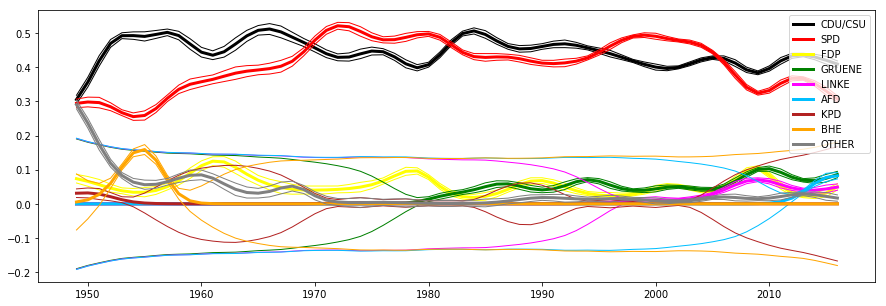

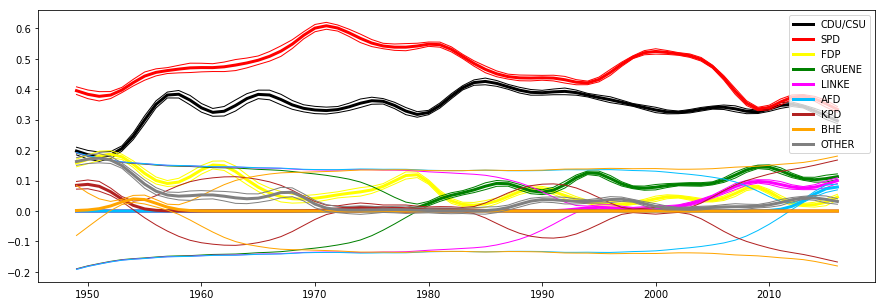

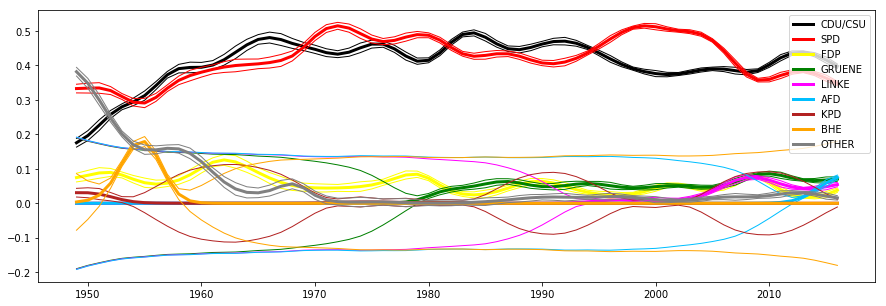

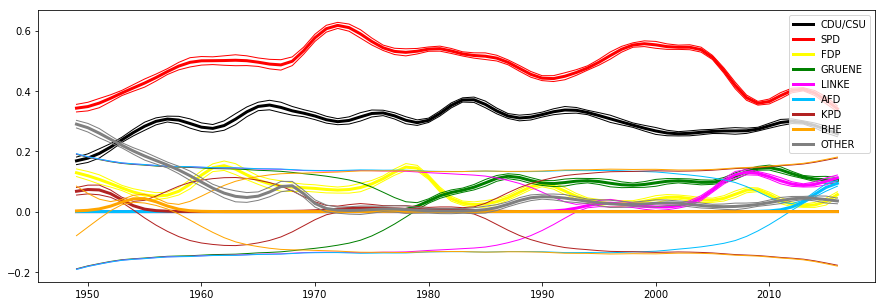

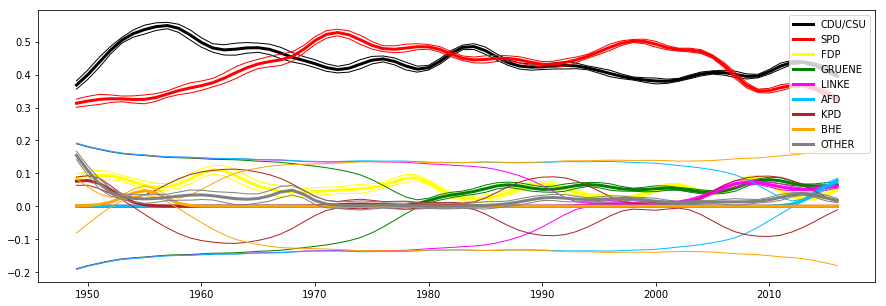

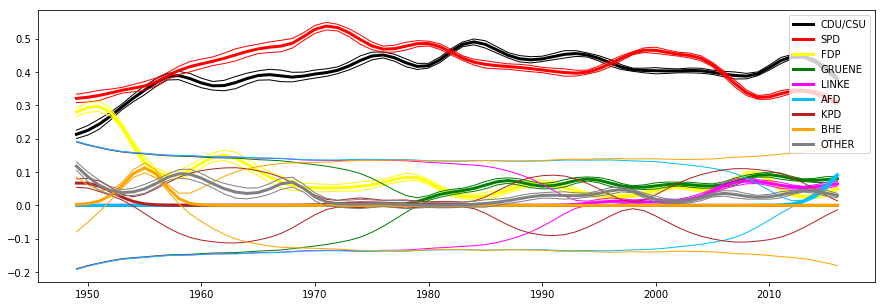

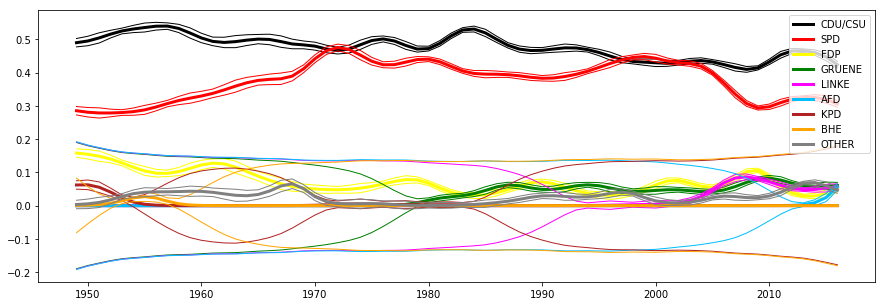

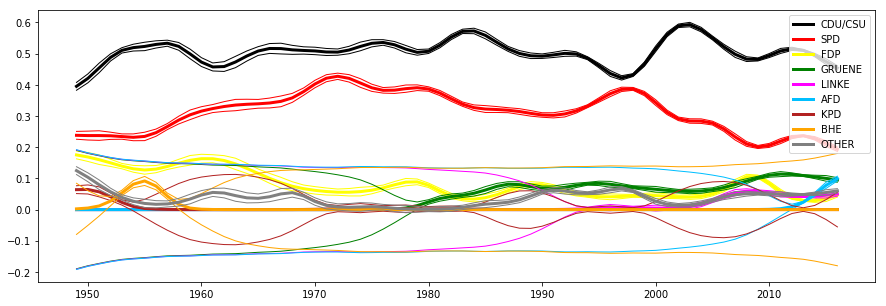

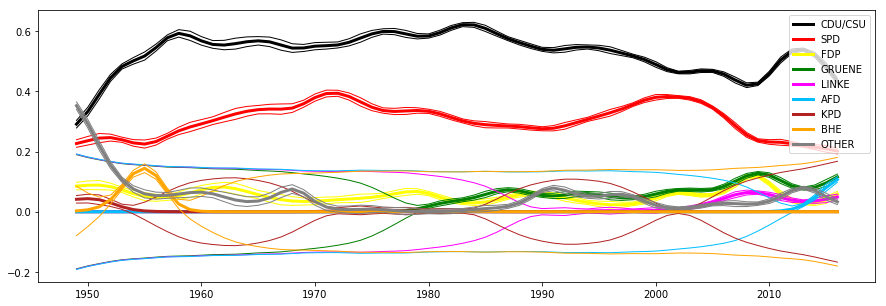

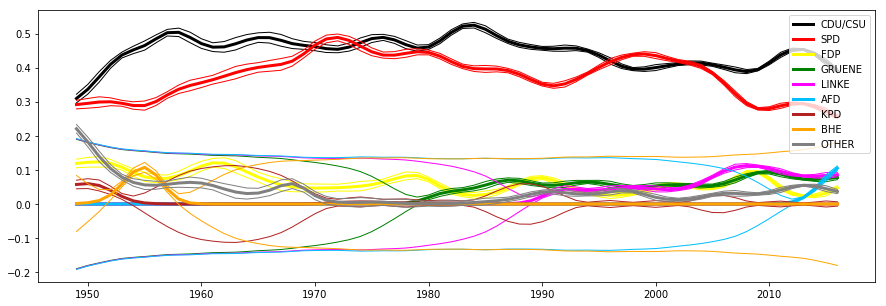

In [40]:
sm_results = [sm_results_ger, sm_results_SH, sm_results_HH, sm_results_NS, sm_results_HB,
             sm_results_NW, sm_results_HS, sm_results_RP, sm_results_BW, sm_results_BY]

results_v = [test_1_ger_v, test_1_SH_v, test_1_HH_v, test_1_NS_v, test_1_HB_v,
            test_1_NW_v, test_1_HS_v, test_1_RP_v, test_1_BW_v, test_1_BY_v]

for j in range(len(sm_results)):
    
    r = sm_results[j]
    v = results_v[j]
    plot_results(r, v)

In [131]:
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams["font.family"] = "Times New Roman"

filenames = ['election_ger.pdf', 'election_SH.pdf', 'election_HH.pdf', 'election_NS.pdf', 'election_HB.pdf',
            'election_NW.pdf', 'election_HS.pdf', 'election_RP.pdf', 'election_BW.pdf', 'election_BY.pdf']

def plot_cum_results(sm_results_cum, results_v, x=T_x, save=False, filename='test.pdf'):

    plt.figure(figsize=(15, 7))
    plt.ylim((0.0, 1.01))
    for i in range(n_parties):
        c = party_colors[parties[i]]
        #c = mc.to_rgba_array(party_colors[parties[i]]).reshape(-1,4)
        #c = tuple(c.reshape(-1)) 
        #print("c: ", c)
        #c_a = np.tile(c,(len(sm_results_cum[:,i]),1))
        #c_a[:, -1] = results_v[:, i] * 10
        #c_a = [tuple(x) for x in c_a]
        #print("c_a: ", c_a)
        plt.plot(x, sm_results_cum[:, i], label=parties[i], color=c)
        y2 = sm_results_cum[:, i].astype('float')
        if i == 0:
            plt.fill_between(x, y1=np.zeros(len(sm_results_cum)), y2=y2, color=c)
        else:
            y1 = sm_results_cum[:, i-1].astype('float')
            plt.fill_between(x, y1=y1, y2=y2, color=party_colors[parties[i]])
    
    plt.legend(prop={'size': 13})        

    plt.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();

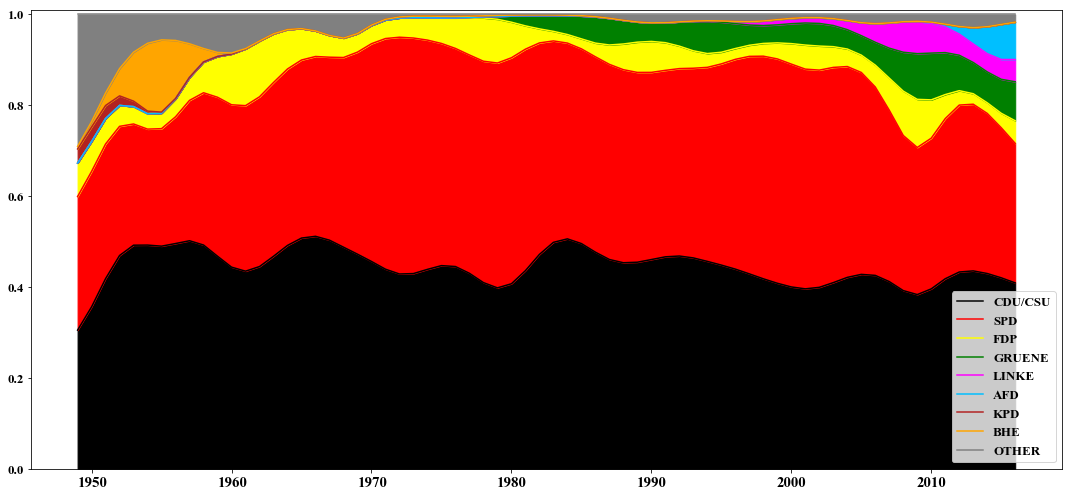

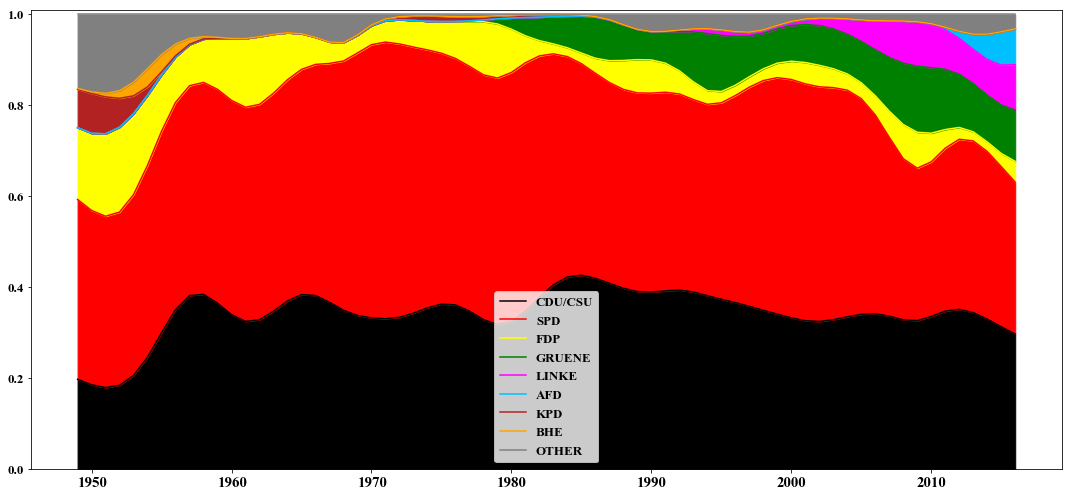

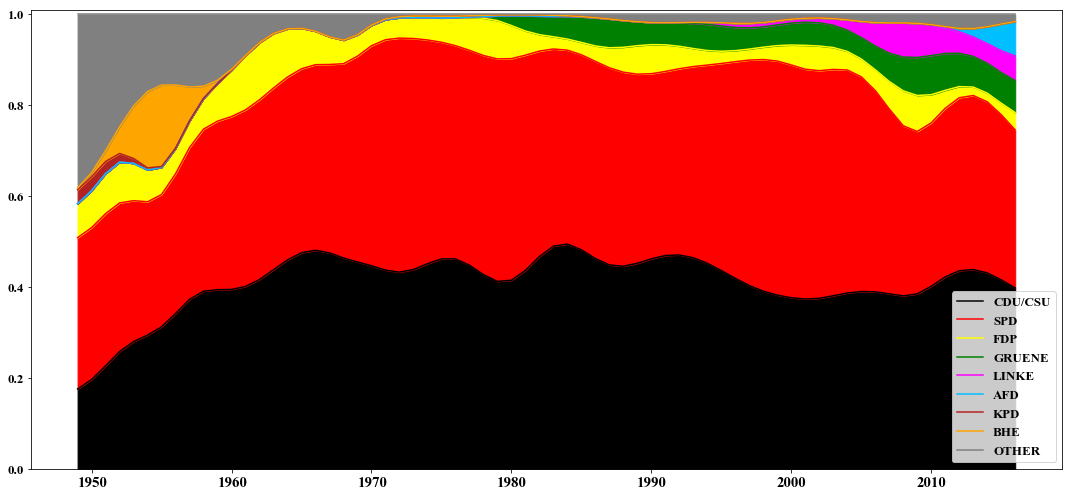

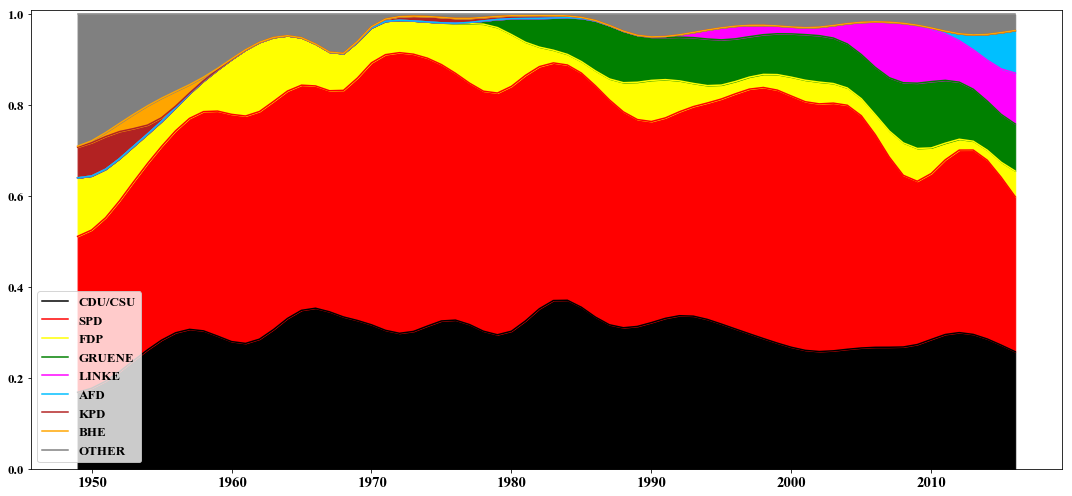

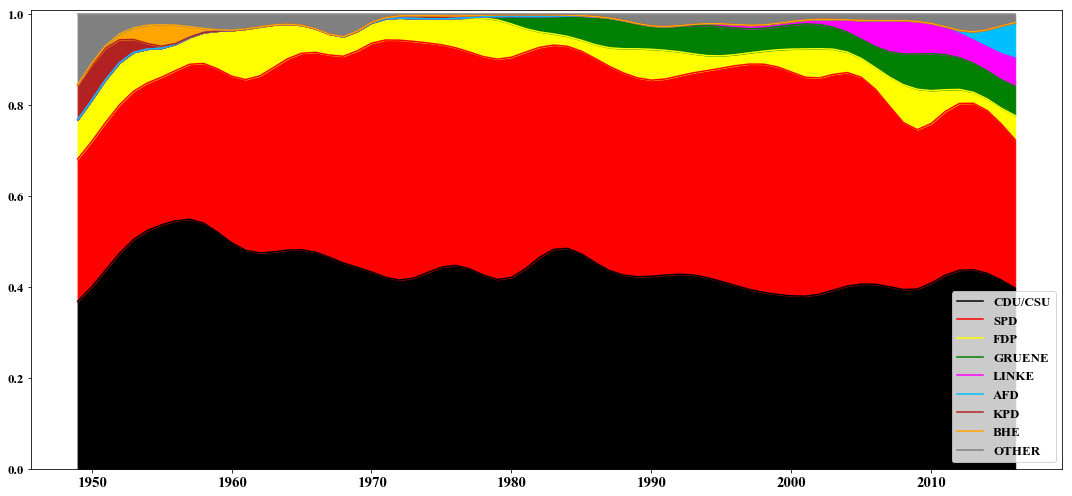

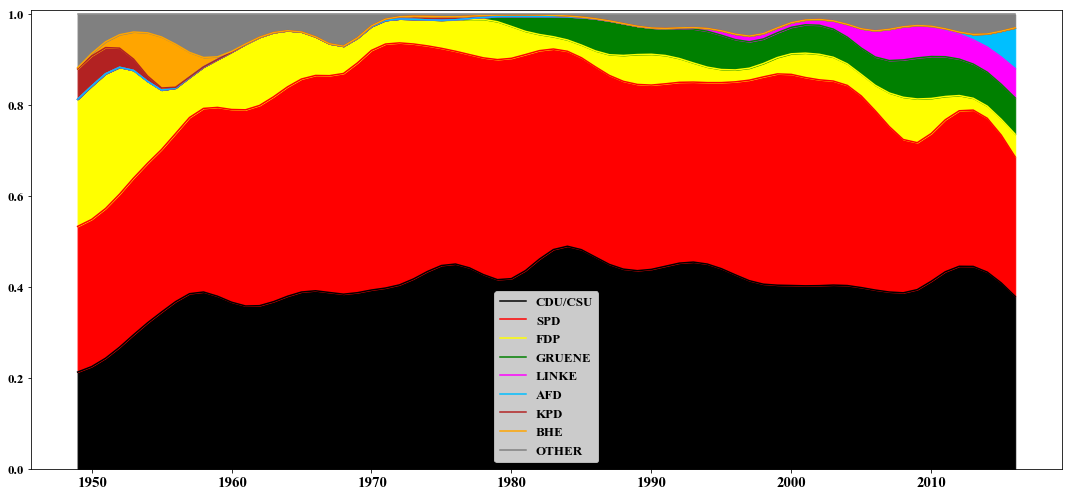

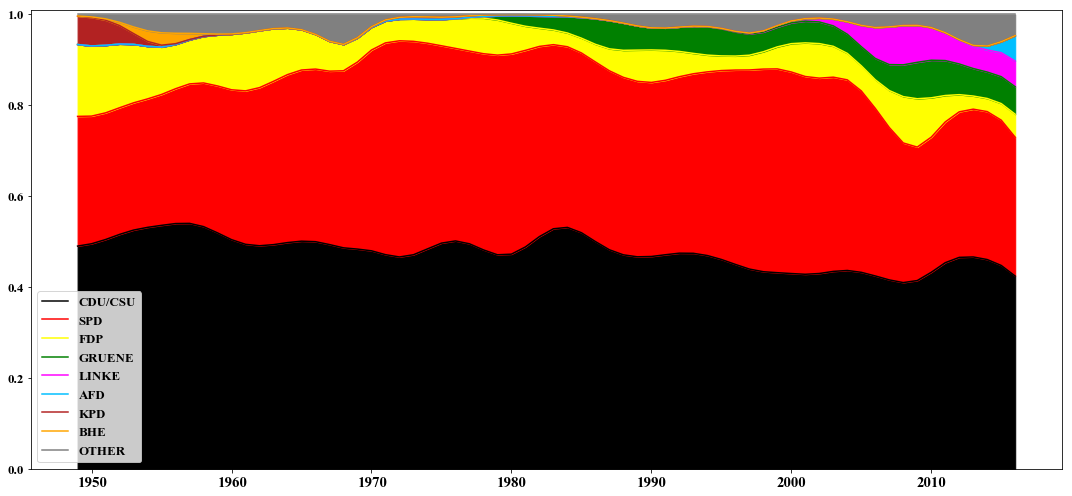

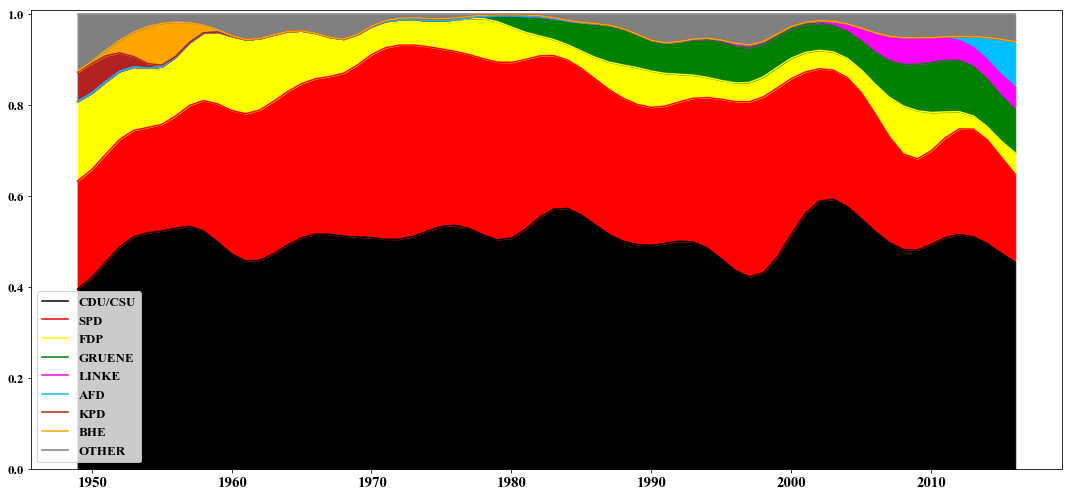

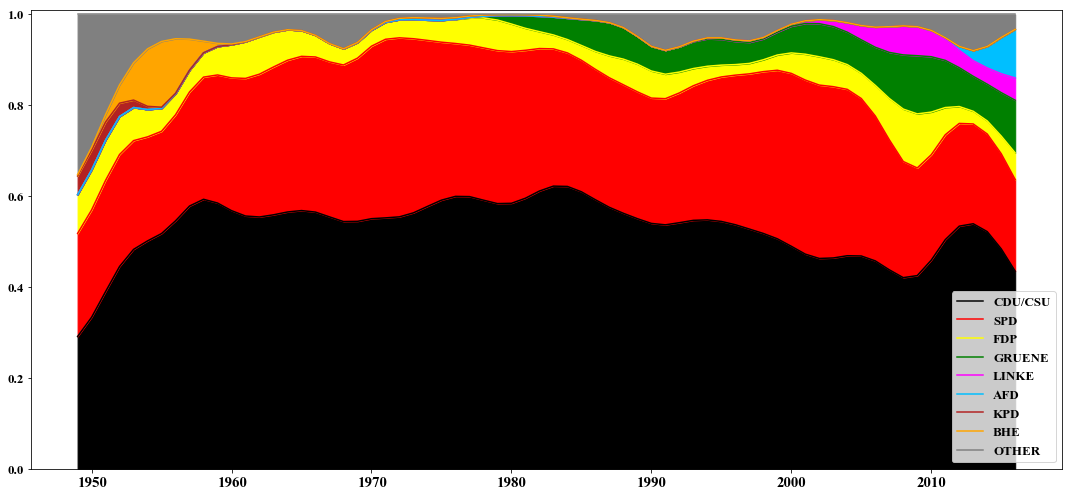

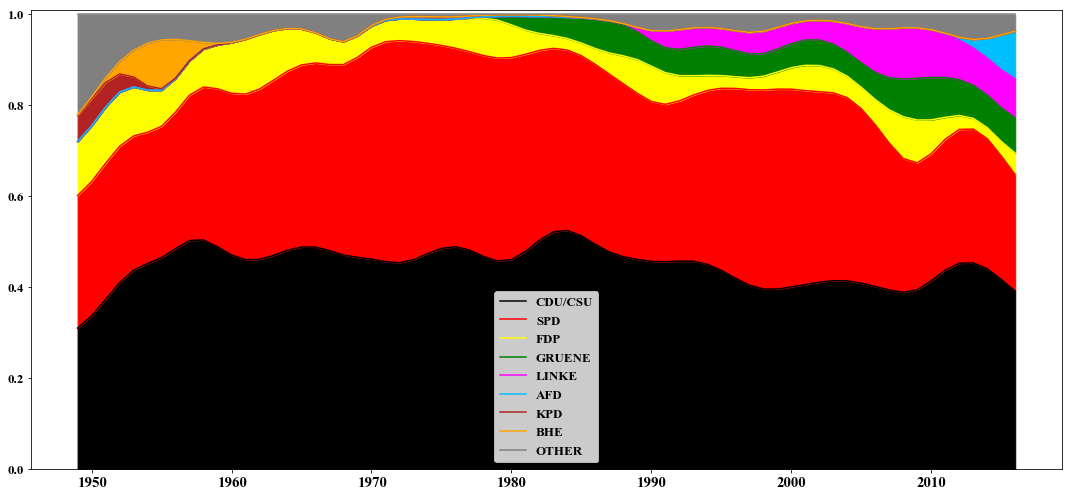

In [132]:
sm_cum_results = [sm_cumulative_ger, sm_cumulative_SH, sm_cumulative_HH, sm_cumulative_NS, sm_cumulative_HB,
                  sm_cumulative_NW, sm_cumulative_HS, sm_cumulative_RP, sm_cumulative_BW, sm_cumulative_BY]


for i in range(len(sm_cum_results)):
    
    r = sm_cum_results[i]
    v = results_v[i]
    plot_cum_results(r, v, save=False, filename=filenames[i])

### compare this to original values

In [ ]:
original_df = medium_df.reset_index(drop=True)
regions_single = ['SH', 'HH', 'NS', 'HB', 'NW', 'HS', 'RP', 'BW', 'BY', 'ger'] 
regions = regions_single* 19
years_ = [y for y in years for i in range(10)]
print(len(years))
original_df['region'] = regions
original_df['year'] = years_
original_df

In [ ]:
def prep_orig(region):
    orig = original_df.loc[original_df['region'] == region]
    orig = orig[parties].values 
    orig_norm = np.array(orig)/orig.sum(1).reshape(-1, 1)
    orig_norm_cum = np.cumsum(orig_norm, 1)
    
    return(orig_norm, orig_norm_cum)

filenames_orig = ['election_orig_ger.pdf', 'election_orig_SH.pdf', 'election_orig_HH.pdf',
                  'election_orig_NS.pdf', 'election_orig_HB.pdf', 'election_orig_NW.pdf',
                  'election_orig_HS.pdf', 'election_orig_RP.pdf', 'election_orig_BW.pdf', 
                  'election_orig_BY.pdf']

for i, reg in enumerate(regions_single):
    orig, orig_cum = prep_orig(reg)
    #plot_results(orig, x=years)
    plot_cum_results(orig_cum, x=years, save=True, filename=filenames_orig[i])

TODOs:
- KPD/DKP
- fix asserts for earlier elections
- double-check where the assert failiers happen
- do prev where possible
- Make plot nice (labels & sizes)
- Run Plots again with the entirety of Germany and compare all federal states
- create plot that are non smoothed with colored "bricks" over states

In [ ]:
print(T_x)
print(years)

In [355]:
def plot_cum_results2(sm_results_cum, results_v, x=T_x, save=False, filename='test.pdf'):

    plt.figure(figsize=(15, 7))
    plt.ylim((0.0, 1.01))
    lb = 0
    r_prev = np.zeros(x.max() - x.min()+1)
    
    v_min, v_max = results_v.min(), results_v.max()
    for i in range(n_parties):
        
        c = party_colors[parties[i]]
        r = sm_results_cum[:,i].astype('float')
        n = len(r)
        v = results_v[:, i].astype('float')
        #v_min, v_max = v.min(), v.max()
        #c = mc.to_rgba_array(c).reshape(-1,4)
        #c_a = np.tile(c,(n,1)).reshape(-1,4)
        #c_a[:, -1] = v
        #c_a = [tuple(x.reshape(-1)) for x in c_a]
        #print(c_a)
        
        #ax = plt.gca()
        y_min, y_max = r.min(), r.max()
        x_min, x_max = x.min(), x.max()
        
        ax = plt.gca()
        line, = ax.plot(x, r, color=c, label = parties[i])
            
        zorder = line.get_zorder()
        
        z = np.empty((x_max - x_min+1, 1, 4), dtype=float)
        c_norm = 1/v * v_min
        rgb = mcolors.colorConverter.to_rgb(c)
        z[:,:,:3] = rgb
        z[:,:,-1] = c_norm.reshape(-1,1)
        z = z.reshape(1, -1, 4)
        
        im = ax.imshow(z, aspect='auto', extent=[x_min, x_max, lb, y_max], origin='lower', zorder=zorder)
        
        xy = np.column_stack([x, r])
        xy_prev = np.column_stack([x, r_prev])[::-1]
        #print(xy_prev)
        xy = np.vstack([[x_min, lb], xy, [x_max, lb], xy_prev])
        #xy = np.vstack([[xmin, ymin], xy, [xmax, ymin] , [xmin, ymin]])
        clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
        ax.add_patch(clip_path)
        im.set_clip_path(clip_path)
        
        lb = y_min
        r_prev = r
        
    plt.legend(prop={'size': 13})        

    plt.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();

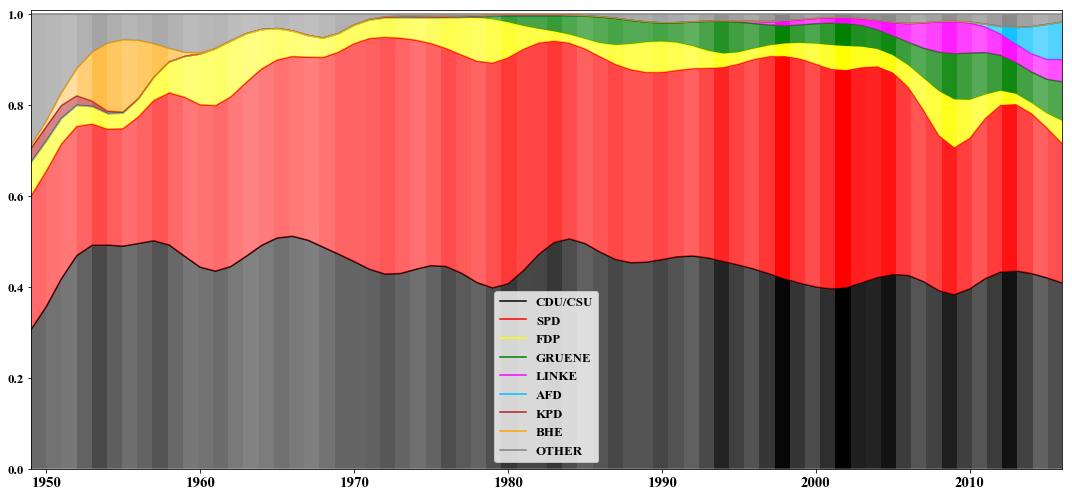

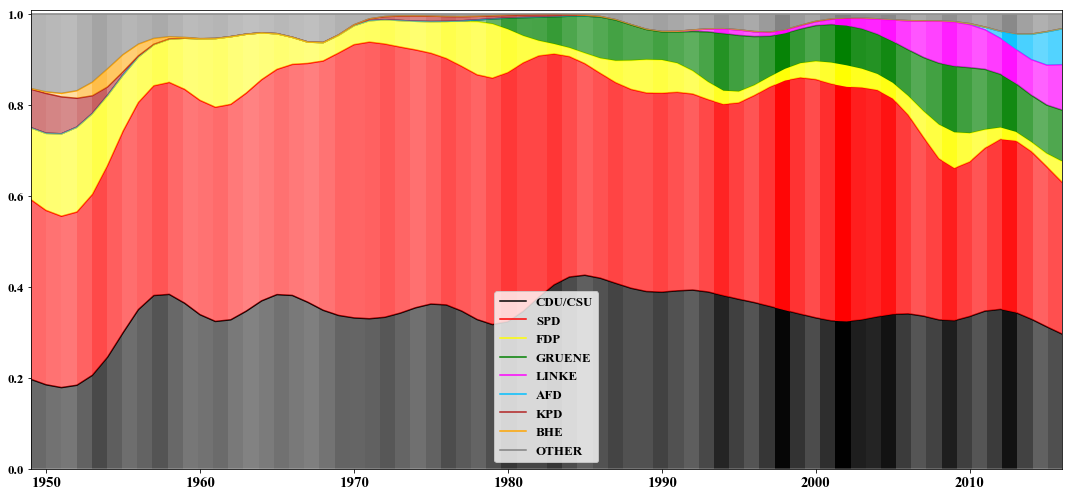

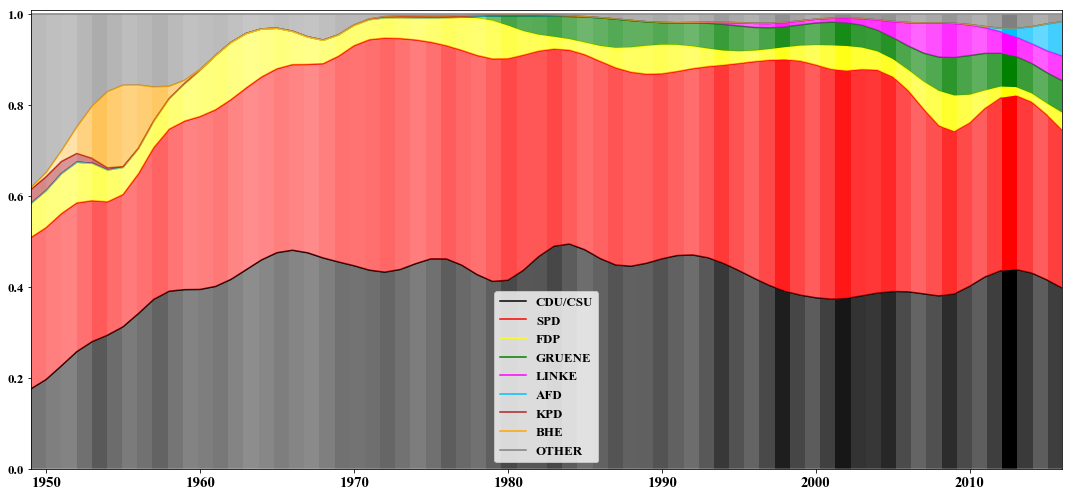

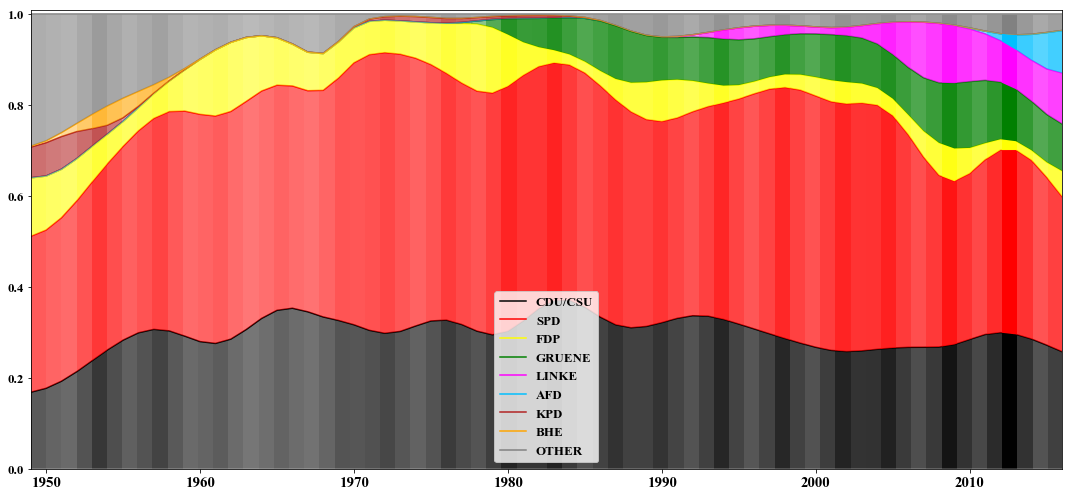

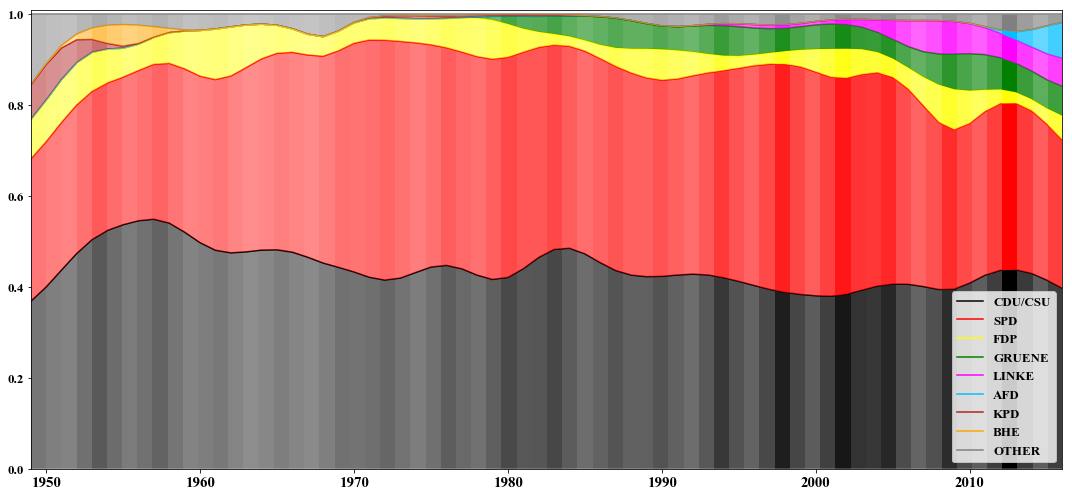

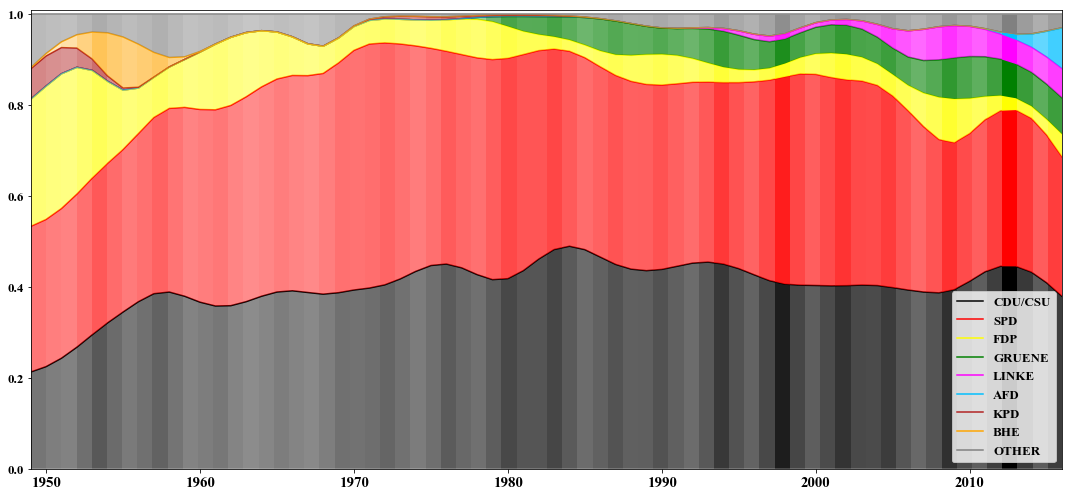

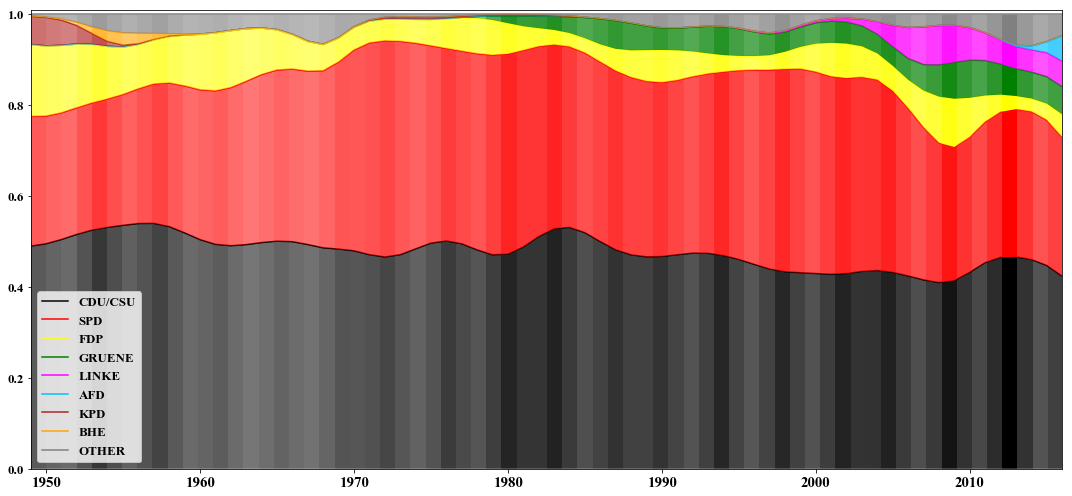

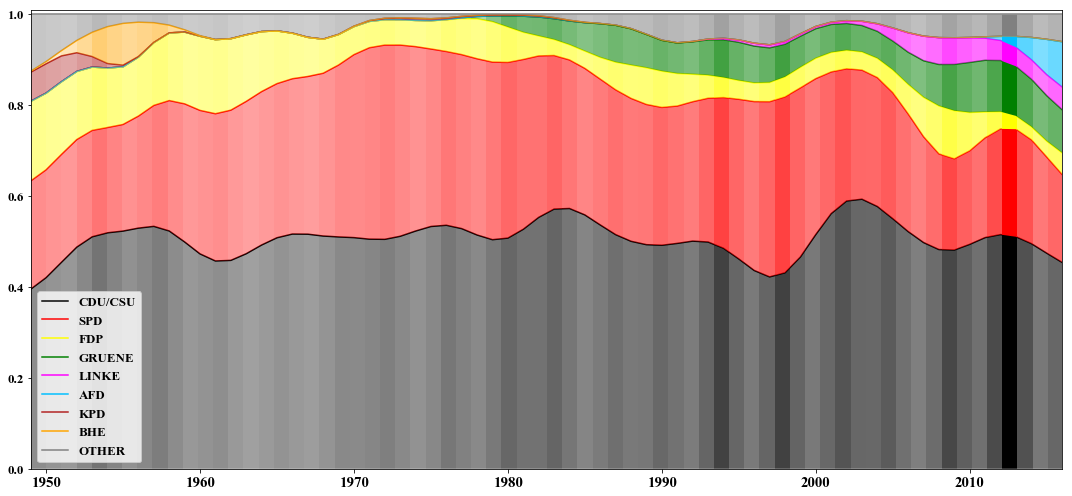

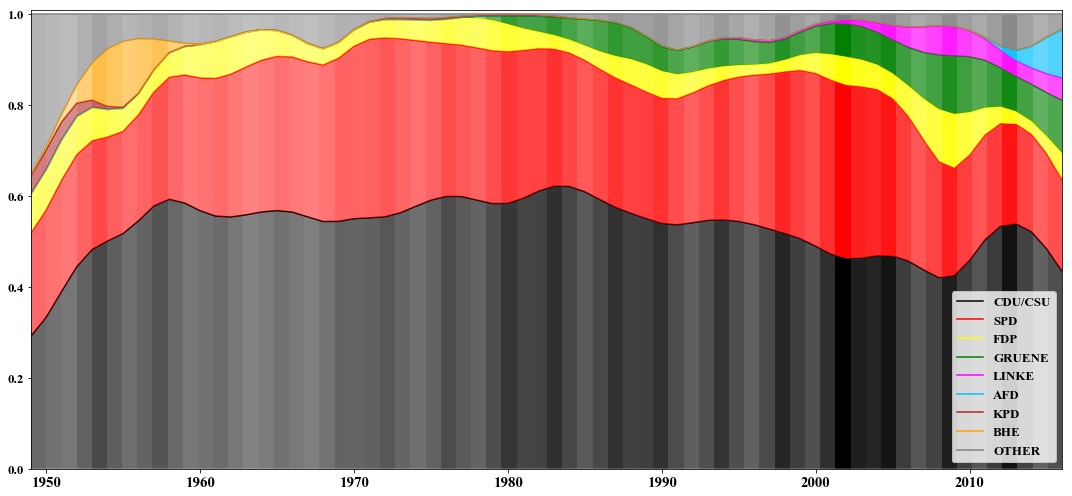

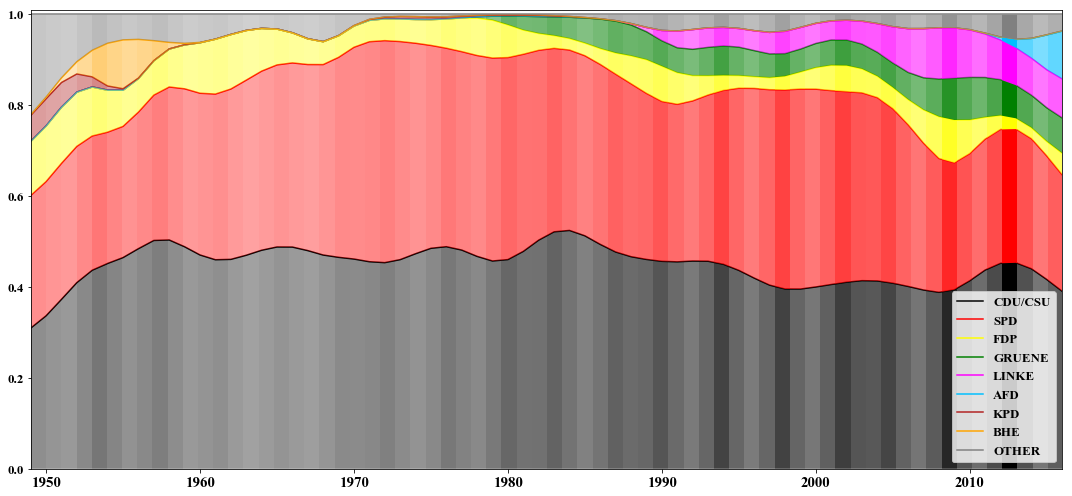

In [356]:
sm_cum_results = [sm_cumulative_ger, sm_cumulative_SH, sm_cumulative_HH, sm_cumulative_NS, sm_cumulative_HB,
                  sm_cumulative_NW, sm_cumulative_HS, sm_cumulative_RP, sm_cumulative_BW, sm_cumulative_BY]


for i in range(len(sm_cum_results)):
    
    r = sm_cum_results[i]
    v = np.sqrt(results_v[i])
    plot_cum_results2(r, v, save=False, filename=filenames[i])
    

(100, 1, 4)
(100, 1, 4)
(100, 1, 4)
(100, 1, 4)
(100, 1, 4)


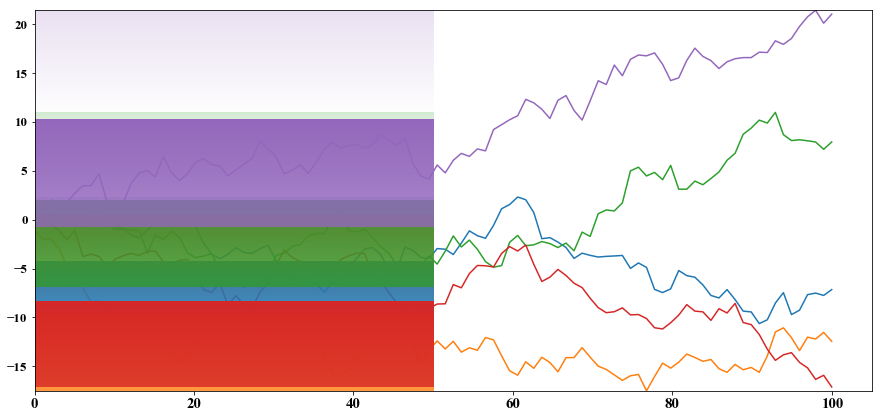

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
np.random.seed(1977)

def main():
    plt.figure(figsize=(15, 7))
    for _ in range(5):
        gradient_fill(*generate_data(100))
    plt.show()

def generate_data(num):
    x = np.linspace(0, 100, num)
    y = np.random.normal(0, 1, num).cumsum()
    return x, y

def gradient_fill(x, y, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 1.0 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    print(np.shape(z))
    z[:50,:,-1] = np.linspace(0.8, alpha, 50)[:,None]
    z[50:,:,-1] = np.linspace(0, 0.2, 50)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax/2, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    ax.autoscale(True)
    return line, im

main()

TypeError: argument must be sequence

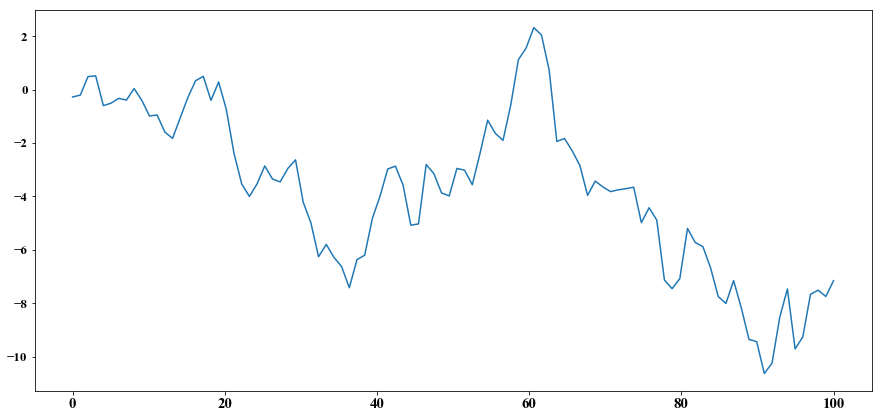

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFilter

np.random.seed(1977)
def demo_blur_underside():
    plt.figure(figsize=(15, 7))
    for _ in range(5):
        # gradient_fill(*generate_data(100), zfunc=None) # original
        gradient_fill(*generate_data(100), zfunc=zfunc)
    plt.show()

def generate_data(num):
    x = np.linspace(0, 100, num)
    y = np.random.normal(0, 1, num).cumsum()
    return x, y

def zfunc(x, y, fill_color='k', alpha=1.0):
    scale = 10
    x = (x*scale).astype(int)
    y = (y*scale).astype(int)
    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()

    w, h = xmax-xmin, ymax-ymin
    z = np.empty((h, w, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb

    # Build a z-alpha array which is 1 near the line and 0 at the bottom.
    img = Image.new('L', (w, h), 0)  
    draw = ImageDraw.Draw(img)
    xy = (np.column_stack([x, y]))
    xy -= xmin, ymin
    # Draw a blurred line using PIL
    draw.line(map(tuple, xy.tolist()), fill=255, width=15)
    img = img.filter(ImageFilter.GaussianBlur(radius=100))
    # Convert the PIL image to an array
    zalpha = np.asarray(img).astype(float) 
    zalpha *= alpha/zalpha.max()
    # make the alphas melt to zero at the bottom
    n = zalpha.shape[0] // 4
    zalpha[:n] *= np.linspace(0, 1, n)[:, None]
    z[:,:,-1] = zalpha
    return z

def gradient_fill(x, y, fill_color=None, ax=None, zfunc=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 1.0 if alpha is None else alpha

    if zfunc is None:
        h, w = 100, 1
        z = np.empty((h, w, 4), dtype=float)
        rgb = mcolors.colorConverter.to_rgb(fill_color)
        z[:,:,:3] = rgb
        z[:,:,-1] = np.linspace(0, alpha, h)[:,None]
    else:
        z = zfunc(x, y, fill_color=fill_color, alpha=alpha)
    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = patches.Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)
    ax.autoscale(True)
    return line, im

demo_blur_underside()